# Star Wars Survey

In this project we're going to explore dataset of Star Wars Survey, which contains respondetns' answers about Star Wars. The survey has been carried out on July 2014 (before the release of `Star Wars: The Force Awakens`) and all data was collected by **FiveThirtyEight team** to answer on following question: **"does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?"**

Our aim is to answer on question about. We'll also try to find any interesting patterns.

### Dataset
The dataset is available [here](https://github.com/fivethirtyeight/data/blob/master/star-wars-survey/StarWars.csv)

## Data reading and first take a look at dataset

In [37]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib library 
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight') #set fivethirtyeight on plots

#opening file 
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

#print first 10 rows
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [38]:
#print all column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Cleaning and Mapping Yes/No Columns

Let's look at 2 columns:

* `Have you seen any of the 6 films in the Star Wars franchise?`
* `Do you consider yourself to be a fan of the Star Wars film franchise?`

Both represent **Yes/No** questions. They contain also **NaN** values where a respondent didn't answer on question. To make our analysys easier, we'll convert from string types to Boolen (**True**, **False** or **NaN**) these columns.

First, we'll creat a dictionary to replace Yes/No values on True or False. Then we'll use `map()` function to fill values on new ones. **NaN** values remain unchanged.

In [39]:
#create dictionary 
yes_no = {
    "Yes": True,
    "No": False
}
#fill yes/no values in Have you seen any of the 6 films in the Star Wars franchise? column
star_wars.iloc[:,1] = star_wars.iloc[:,1].map(yes_no)
#fill yes/no values in Do you consider yourself to be a fan of the Star Wars film franchise? column
star_wars.iloc[:,2] = star_wars.iloc[:,2].map(yes_no)

In [40]:
#check all values in Have you seen any of the 6 films in the Star Wars franchise? column
print(star_wars.iloc[:,1].value_counts(dropna=False))
print('\n')
#check all values in Do you consider yourself to be a fan of the Star Wars film franchise? column
print(star_wars.iloc[:,2].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


As we can see above, most people have seen any Star Wars movie and almost evry second person consider to be a fan of the Star Wars film franchise.

In first column: `Have you seen any of the 6 films in the Star Wars franchise?` we have only True and False values, so it means that respondents had to choose `Yes` or `No` only. In second column, `Do you consider yourself to be a fan of the Star Wars film franchise?` some respondents (almost 30% of all) fill the answer blank.

## Cleaning and Mapping Checkbox Columns

Taking another look at our data set, show us that next 6 columns represent a single checkbox question:

| Column | Description |
| :----------- | ----------- |
| Which of the following Star Wars films have you seen? Please select all that apply. | Whether or not the respondent saw **Star Wars: Episode I The Phantom Menace** |
| Unnamed: 4 | Whether or not the respondent saw **Star Wars: Episode II Attack of the Clones**, |
| Unnamed: 5 | Whether or not the respondent saw **Star Wars: Episode III Revenge of the Sith** |
| Unnamed: 6 | Whether or not the respondent saw **Star Wars: Episode IV A New Hope** |
| Unnamed: 7 | Whether or not the respondent saw **Star Wars: Episode V The Empire Strikes Back** |
| Unnamed: 8 | Whether or not the respondent saw **Star Wars: Episode VI Return of the Jedi** |

Column names and thier values are a bit messy. First, we'll convert all values on **True** or **False**. For example if somebody have seen the movie **Star Wars: Episode II Attack of the Clones**, he's answerd in `Unnamed: 4` column in that name of the film. Whereas, **NaN** value represents that respodent didn't see the movie or didn't answer.



We noticed that some values have sometimes 2 spaces between a word. To avoid mistake, we will loop over values in 6 columns and assign all to list.

In [41]:
#create empty list
movies = []
for col in star_wars.columns[3:9]:
    movies.append(star_wars[col].unique()[0])    

print(movies)    

['Star Wars: Episode I  The Phantom Menace', 'Star Wars: Episode II  Attack of the Clones', 'Star Wars: Episode III  Revenge of the Sith', 'Star Wars: Episode IV  A New Hope', 'Star Wars: Episode V The Empire Strikes Back', 'Star Wars: Episode VI Return of the Jedi']


In [42]:
#create dictionary
movie_yes_no = {}
#add all values as key and assign True to each of them
for movie in movies:
    movie_yes_no[movie] = True
#add Nan values and assign False    
movie_yes_no[np.nan] = False
#check all values
movie_yes_no    

{'Star Wars: Episode I  The Phantom Menace': True,
 'Star Wars: Episode II  Attack of the Clones': True,
 'Star Wars: Episode III  Revenge of the Sith': True,
 'Star Wars: Episode IV  A New Hope': True,
 'Star Wars: Episode V The Empire Strikes Back': True,
 'Star Wars: Episode VI Return of the Jedi': True,
 nan: False}

In [43]:
#fill each values in all 6 columns on True or False
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_yes_no)

#check if converting passed well   
for col in star_wars.columns[3:9]:
    print(star_wars[col].value_counts(dropna=False))
    print('\n')

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64


False    615
True     571
Name: Unnamed: 4, dtype: int64


False    636
True     550
Name: Unnamed: 5, dtype: int64


True     607
False    579
Name: Unnamed: 6, dtype: int64


True     758
False    428
Name: Unnamed: 7, dtype: int64


True     738
False    448
Name: Unnamed: 8, dtype: int64




Our values look correctly. Let's rename all 6 columns to better reflect what they represent.

In [44]:
#display columns before change
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [45]:
#rename columns
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4" : 'seen_2',
    "Unnamed: 5" : 'seen_3',
    "Unnamed: 6" : 'seen_4',
    'Unnamed: 7' : 'seen_5',
    'Unnamed: 8' : 'seen_6'
})

In [46]:
#display data set after changes
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning the Ranking Columns

Our next 6 columns are:

| Column | Description |
| :----------- | ----------- |
| Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. | How much the respondent liked **Star Wars: Episode I The Phantom Menace** |
| Unnamed: 10 | How much the respondent liked **Star Wars: Episode II Attack of the Clones** |
| Unnamed: 11 | How much the respondent liked **Star Wars: Episode III Revenge of the Sith** |
| Unnamed: 12 | How much the respondent liked **Star Wars: Episode IV A New Hope** |
| Unnamed: 13 | How much the respondent liked **Star Wars: Episode V The Empire Strikes Back** |
| Unnamed: 14 | How much the respondent liked **Star Wars: Episode VI Return of the Jedi** |

Columns above ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite.

First, we'll convert each of the columns above to `float` type. Then we'll change column names.

In [47]:
#converting each column to float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [48]:
#rename each column
star_wars = star_wars.rename(columns={
            'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.' : 'ranking_1',
            'Unnamed: 10' : 'ranking_2',
            'Unnamed: 11' : 'ranking_3',
            'Unnamed: 12' : 'ranking_4',
            'Unnamed: 13' : 'ranking_5',
            'Unnamed: 14' : 'ranking_6'
})

In [49]:
#display data set after changes
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Finding the Highest-Ranked Movie

Now, having numeric type columns, we can count the mean of each ranking column to check what part of Star Wars movie is highest-rated.

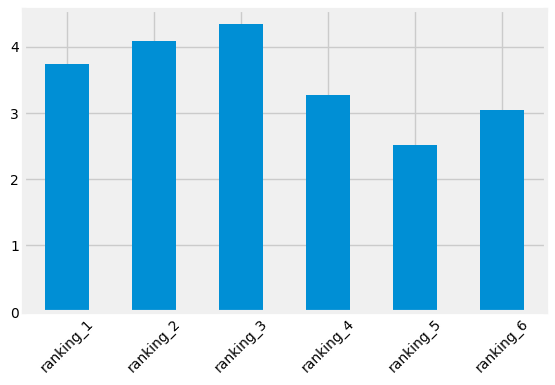

In [50]:
#count the average of each ranking column
movie_ranking_avg = star_wars[star_wars.columns[9:15]].mean()
#set to display plot in Jupyter
%matplotlib inline 
#create bar plot
movie_ranking_avg.plot.bar(rot=45)

Looking at bar plot above, we see that highest average score (around 2.5) received `ranking_5` column which means **Star Wars: Episode V The Empire Strikes Back**. For the record, the lowest score the better movie was for respondent. 

Films: **Star Wars: Episode IV A New Hope** and **Star Wars: Episode VI Return of the Jedi** got also high marks - (both around 3.0). Whereas, **Episode I The Phantom Menace**, **Episode II Attack of the Clones** and **Episode III Revenge of the Sith** have been the lowest-rated. Part III got the worst score - over 4.0.

Why respodents have choosen movies like this? When we check chronology of film releases [click here]('https://pl.wikipedia.org/wiki/Gwiezdne_wojny#Filmy'), we found that Episodes IV, V and VI were released much earlier than 3 others. Moreover, Episode III, which was released the latest, in 2005 got the worst score. Is that so means that respodents have higher fondness for olders Episodes?

## Finding the Most Viewed Movie

We can also count number of total views each Episode based on `seen` columns.

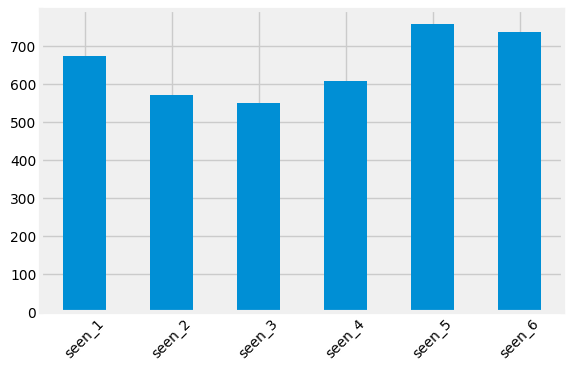

In [51]:
#sum all rows in seen columns
movie_views = star_wars[star_wars.columns[3:9]].sum()
#create bar plot
movie_views.plot.bar(rot=45)

Surprisingly, we can see on plot above that **Episode V** and **VI** are most viewed movies. As we remeber, these parts of Star Wars movie received also the best average score, so we can observe some postive correaltion between ranking score and number of views. It may mean that respodents who didn't watch any Star Wars film before, could have been choosen the movie based on the ranking on Interent before. 

Episode III has been watached the least often, so it may have a connection with the lowest average score.

The exception is **Episode I**, because it is also popular as part **V** and **VI** and got worse socre than **Episode IV**. However, if we think about it, respondents who never watch Star Wars, could also start from part **I**. Some of them Star Wars couldn't appealed and they'll not continue watching next Episodes. 

## Exploring the Data by Binary Segments

### Gender

We know which Star Wars Episodes received best score and which one was most popular. Now, let's investigate these criteria between males and females. First, we have to split dataframe into two groups based on `Gender` column. Then we'll able to count views and average ranking socre by each gender.

In [52]:
#select rows with Males only
males = star_wars[star_wars["Gender"] == "Male"]
#select rows with Females only
females = star_wars[star_wars["Gender"] == "Female"]

#count avg ranking score by Males
movie_avg_score_males = males[males.columns[9:15]].mean()
#count avg ranking score by Females
movie_avg_score_females = females[females.columns[9:15]].mean()

#count views by Males
movie_views_males = males[males.columns[3:9]].sum()
#count views by Females
movie_views_females = females[females.columns[3:9]].sum()

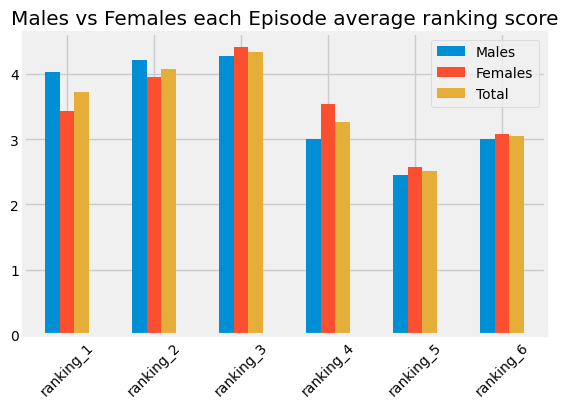

In [53]:
#combine 3 series with avg score ranking 
males_vs_females_ranking = (pd.concat([movie_avg_score_males, movie_avg_score_females, movie_ranking_avg], axis=1).
                        rename({0 : 'Males', 1: 'Females', 2 :'Total'}, axis=1)) #change column names from default values
#create bar plot
males_vs_females_ranking.plot.bar(rot=45)
plt.title('Males vs Females each Episode average ranking score')
plt.show()

There is no any significant pattern, but we may spot feamles rate Episodes IV, V and VI which generally are the best, a little worse than Males. The biggest difference is in Episode I, where Females rated on around 3.3 score and males - 4.0.

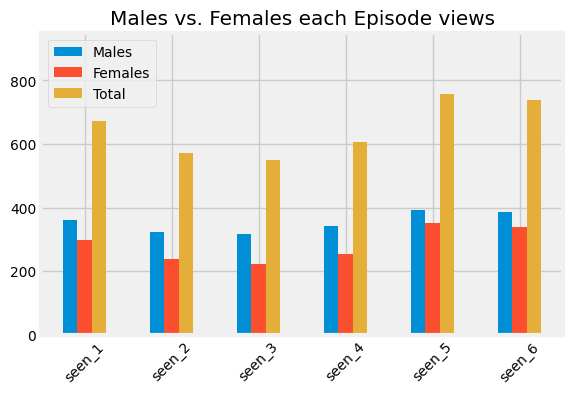

In [54]:
#combine 3 series with views
males_vs_females_views = (pd.concat([movie_views_males, movie_views_females, movie_views], axis=1).
                  rename({0 : 'Males', 1: 'Females', 2 :'Total'}, axis=1)) #change column names from default values
#create bar plot
males_vs_females_views.plot.bar(rot=45)
plt.title('Males vs. Females each Episode views')
plt.ylim([0,950])
plt.show()

Looking at plot above, we may spot that males more often have been watched Star Wars than Females. Episode V which is the most popular and got the best score males and females watched it on simillar level, the difference is the lowest here. Whereas, the biggest difference is in Episode III. One of the reason could be a fact that girls suggest more about the movie ranking which can be found on the Internet than boys.

### Education 

Let's check `Education` column which contains information about education level of each respondent.

In [55]:
#check all values in Education column
star_wars.Education.value_counts(dropna=False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
NaN                                 150
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

There is many `NaN` values, so we also want it to show on our plot. We'll change `NaN` value on `Not specified` to have better view.

In [56]:
#create dictionary  
nan = {np.nan : 'Not specified'}
#replace nan values 
star_wars['Education'] = star_wars['Education'].replace(nan)

print(star_wars.Education.value_counts(dropna=False))

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
Not specified                       150
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64


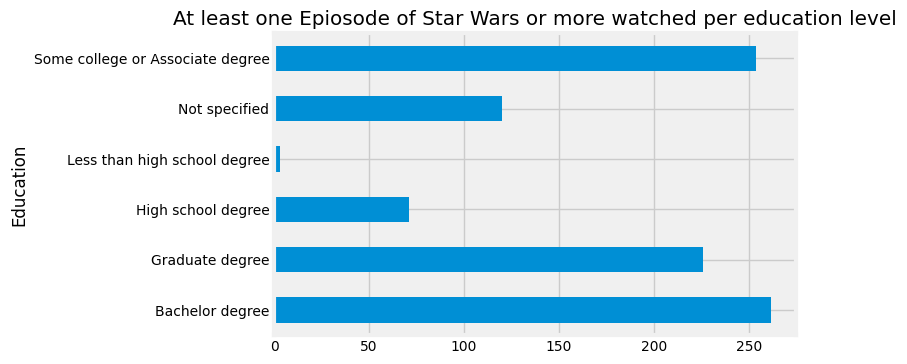

In [57]:
#create plot with Education level
education = star_wars.pivot_table(index='Education', 
                          values='Have you seen any of the 6 films in the Star Wars franchise?', 
                          aggfunc=np.sum
                                 )
education.plot.barh(legend=False)
plt.title('At least one Epiosode of Star Wars or more watched per education level')
plt.show()

We may see that the most people who have seen any of Star Wars movie are well educated. They have:
* `Bachelor degree`, 
* `Some collegae or Associate degree`,
* `Graduate degree`.

There are huge difference beetween people from groups above and people who have only High School degree or less. We don't want to jump to conclusions, so we'll need investigate `Age` column also and check age of each respondent.

## Location

`Location (Census Region)` contains inforamtion about from which USA region respondent come from. 

In [58]:
#check all values in Location (Census Region) column
star_wars['Location (Census Region)'].value_counts(dropna=False)

East North Central    181
Pacific               175
South Atlantic        170
NaN                   143
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Location (Census Region), dtype: int64

Column above contain also many `NaN` values so we will replace them on `Not specified` again.

In [59]:
#replace nan values 
star_wars['Location (Census Region)'] = star_wars['Location (Census Region)'].replace(nan)
print(star_wars['Location (Census Region)'].value_counts(dropna=False))

East North Central    181
Pacific               175
South Atlantic        170
Not specified         143
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Location (Census Region), dtype: int64


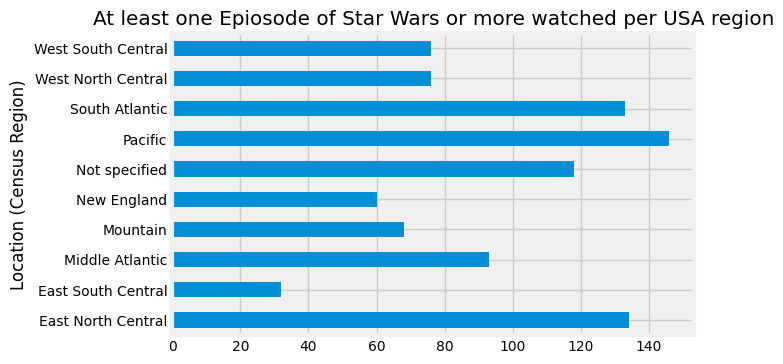

In [60]:
#create plot with regions
regions = star_wars.pivot_table(index='Location (Census Region)', 
                          values='Have you seen any of the 6 films in the Star Wars franchise?', 
                          aggfunc=np.sum
                          )
regions.plot.barh(legend=False)
plt.title('At least one Epiosode of Star Wars or more watched per USA region')
plt.show()

People who most often watch any Star Wars movie usually come frome:

* `Pacific`,
* `South Atlantic`,
* `East North Central`.

People from East South Central watched Star Wars the least often.

## Age

Previously, we checked Education level of each respondent who watch one or more Star Wars film. Now, we check `age` column.

In [61]:
#check all values in Location (Census Region) column
star_wars['Age'].value_counts(dropna=False)

45-60    291
> 60     269
30-44    268
18-29    218
NaN      140
Name: Age, dtype: int64

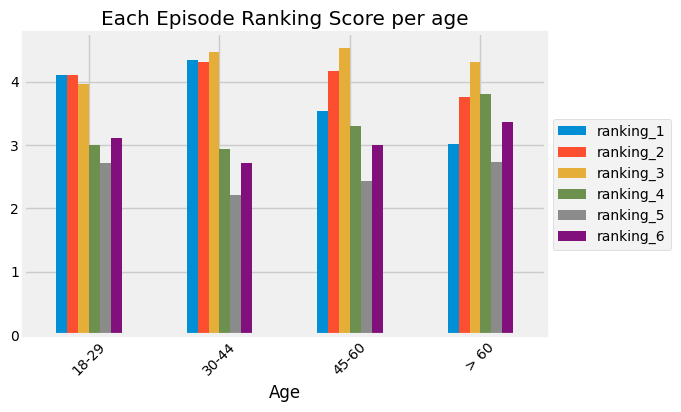

In [62]:
#group by age and count mean each column
group_age_score = star_wars.groupby(['Age']).mean()
#select only ranking column
group_age_score = group_age_score[group_age_score.columns[8:15]]
#create bar plot
group_age_score.plot.bar(rot=45).legend(loc='center left',bbox_to_anchor=(1.0, 0.5)) #set legend outside the plot
plt.title('Each Episode Ranking Score per age')
plt.show()

We can spot that people in age 30-44 rated Episodes IV - VI the best. Moreover, all gropus rated Episode III the worst execpt young people in age 18-29. Epiosed III was realise in 2005, so this is the newest film. Maybe, better special effects contributed to ranking improvement in that group.

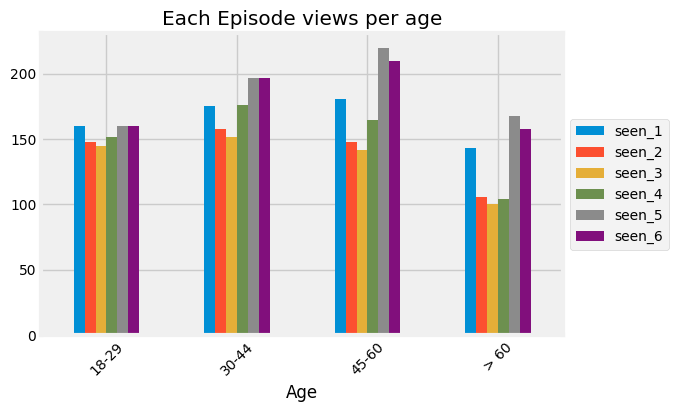

In [63]:
#select columns age and seens
group_age_views = star_wars[['Age', 'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']]
#grop by age and count sum
group_age_views = group_age_views.groupby(['Age']).sum()
#create bar plot
group_age_views.plot.bar(rot=45).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title('Each Episode views per age')
plt.show()

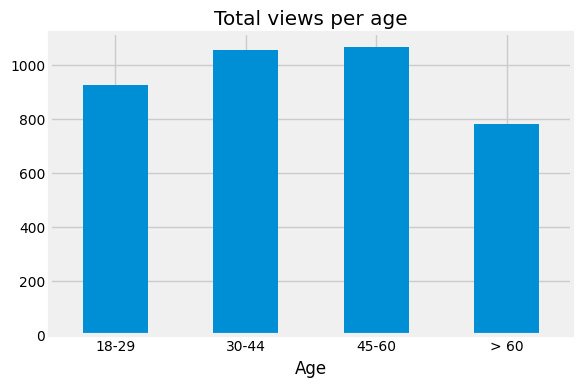

In [64]:
#sum all epioseds views per each age group
sum_group_age_views = group_age_views.sum(axis=1)
#create bar plot
sum_group_age_views.plot.bar(rot=0)
plt.title('Total views per age')
plt.show()

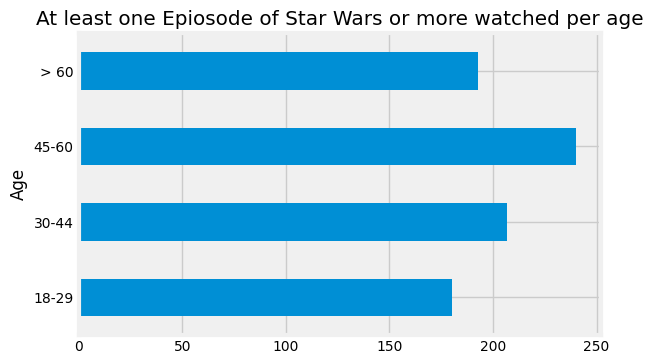

In [65]:
#pivot table to grop age and count sum at least one Epiosed watched
age_pvt_table = star_wars.pivot_table(index='Age', 
                          values='Have you seen any of the 6 films in the Star Wars franchise?',  
                          aggfunc=np.sum)
#create bar plot                                 )
age_pvt_table.plot.barh(legend=False)
plt.title('At least one Epiosode of Star Wars or more watched per age')
plt.show()

Previously, we spot that people in age 30-44 rated Epiosodes IV-VI, but the most views part V and VI is made by people in 45-60s.

However, youngest and the oldest people asnwered **YES** on question: `Have you seen any of the 6 films in the Star Wars franchise?` on similar level, but the youngest group who wateched 2 or more Episodes are much bigger (more than 100). Whereas respondents in age 30-44 have seen much often few Epiosodes than group in 45-60, beacuse total views is on the same level, but less people in 30-44 watched at least one part.

## Looking for most favourite and most dislike character

In our dataset, respondents could marked which character from Star Wars like. Let's check what asnwers they had to choose first.

In [66]:
#Looking into columns 15-29
character_cols = [15,16,17,18,19,20,21,22,23,24,25,26,27,28]

for i in character_cols:
    print (star_wars.columns[i])
    print (star_wars[star_wars.columns[i]].value_counts(dropna=False))
    print('\n')

Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.
Very favorably                                 610
NaN                                            357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her., dtype: int64


Unnamed: 16
Very favorably                                 552
NaN                                            355
Somewhat favorably                             219
Neither favorably nor unfavorably (neutral)     38
Somewhat unfavorably                            13
Unfamiliar (N/A)                                 6
Very unfavorably                                 3
Name: Unnamed: 16, dtype: int6

As we can see, for each character respondents could marked 6 answers. Our aim is find who character is the most like and who is most dislike. We'll convert values: `Very favorably` and `Somewhat favorably` on **like**, wheras `Somewhat unfavorably` and `Very unfavorably` on **dislike** to simplify our analysys.

In [67]:
#Cleaning the answers for readability

answer_map = {'Very favorably': 'like',
             'Somewhat favorably': 'like',
             'Neither favorably nor unfavorably (neutral)': 'Neutral',
             'Somewhat unfavorably': 'dislike',
             'Unfamiliar (N/A)': 'Unfamiliar',  
              'Very unfavorably': 'dislike',
            }


#Names of each character was in column name at the end, but it was some problem to read them. 
#All names above has been copy from another projects Dataquest community


#renaming column names
char_map = {'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
            'Unnamed: 16': 'Luke Skywalker',
            'Unnamed: 17': 'Princess Leia Organa',
            'Unnamed: 18': 'Anakin Skywalker',
            'Unnamed: 19': 'Obi Wan Kenobi',
            'Unnamed: 20': 'Emperor Palpatine',
            'Unnamed: 21': 'Darth Vader',
            'Unnamed: 22': 'Lando Calrissian',
            'Unnamed: 23': 'Boba Fett',
            'Unnamed: 24': 'C-3P0',
            'Unnamed: 25': 'R2 D2',
            'Unnamed: 26': 'Jar Jar Binks',
            'Unnamed: 27': 'Padme Amidala',
            'Unnamed: 28': 'Yoda'}
#see after changes 
for i in character_cols:
    star_wars[star_wars.columns[i]] = star_wars[star_wars.columns[i]].map(answer_map)
    star_wars.rename(mapper=char_map, axis=1, inplace=True)
    print(star_wars[star_wars.columns[i]].value_counts())
    print('\n')
 


like          761
Neutral        44
Unfamiliar     15
dislike         9
Name: Han Solo, dtype: int64


like          771
Neutral        38
dislike        16
Unfamiliar      6
Name: Luke Skywalker, dtype: int64


like          757
Neutral        48
dislike        18
Unfamiliar      8
Name: Princess Leia Organa, dtype: int64


like          514
Neutral       135
dislike       122
Unfamiliar     52
Name: Anakin Skywalker, dtype: int64


like          750
Neutral        43
Unfamiliar     17
dislike        15
Name: Obi Wan Kenobi, dtype: int64


like          253
Neutral       213
dislike       192
Unfamiliar    156
Name: Emperor Palpatine, dtype: int64


like          481
dislike       251
Neutral        84
Unfamiliar     10
Name: Darth Vader, dtype: int64


like          365
Neutral       236
Unfamiliar    148
dislike        71
Name: Lando Calrissian, dtype: int64


like          291
Neutral       248
dislike       141
Unfamiliar    132
Name: Boba Fett, dtype: int64


like          703
Ne

Now we are ready to compare the most like and dislake Star Wars character. Let's start from the most favourite one.

In [68]:
#create empty dict and loop over all columns contain like value 
char_like_dict = {}
for col in star_wars.columns[15:29]:
    char_like_dict[col] = len(star_wars[star_wars[col] == 'like']) #take all like values
 
print(char_like_dict)

{'Han Solo': 761, 'Luke Skywalker': 771, 'Princess Leia Organa': 757, 'Anakin Skywalker': 514, 'Obi Wan Kenobi': 750, 'Emperor Palpatine': 253, 'Darth Vader': 481, 'Lando Calrissian': 365, 'Boba Fett': 291, 'C-3P0': 703, 'R2 D2': 747, 'Jar Jar Binks': 242, 'Padme Amidala': 351, 'Yoda': 749}


In [69]:
#create list to short some of character names
ini_list = ['Solo', 'Luke', 'Leia', 'Anakin', 
            'Obi Wan', 'Emperor', 'Darth Vader', 
            'Lando', 'Boba', 'C-3P0', 'R2 D2', 
            'Jar', 'Amidala', 'Yoda']
#combaine list with values from char_like_dict and create final_like_dict
final_like_dict = dict(zip(ini_list, list(char_like_dict.values())))
final_like_dict

{'Solo': 761,
 'Luke': 771,
 'Leia': 757,
 'Anakin': 514,
 'Obi Wan': 750,
 'Emperor': 253,
 'Darth Vader': 481,
 'Lando': 365,
 'Boba': 291,
 'C-3P0': 703,
 'R2 D2': 747,
 'Jar': 242,
 'Amidala': 351,
 'Yoda': 749}

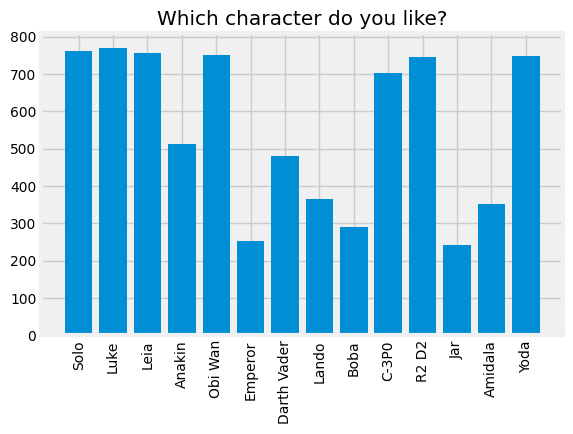

In [70]:
#select keys from final_like_dict
keys = final_like_dict.keys()
#select values from final_like_dict
values = final_like_dict.values()

#create bar plot
plt.bar(keys, values)
plt.xticks(rotation=90)
plt.title('Which character do you like?')
plt.show()

Looking at plot above respondents have been chosen following characters:

* `Hans Solo`,
* `Luke Skywalker`,
* `Obi Wan Kenobi`,
* `R2 D2`,
* `Yoda`.

Each character above got around 750 likes.

Let's check who is most hated.

In [71]:
#create empty dict and loop over all columns contain dislike value 
char_dislike_dict = {}
for col in star_wars.columns[15:29]:
    char_dislike_dict[col] = len(star_wars[star_wars[col] == 'dislike'])
 
print(char_dislike_dict)
#combaine list with values from char_dislike_dict and create final_dislike_dict
final_dislike_dict = dict(zip(ini_list, list(char_dislike_dict.values())))
final_dislike_dict

print(final_dislike_dict)

{'Han Solo': 9, 'Luke Skywalker': 16, 'Princess Leia Organa': 18, 'Anakin Skywalker': 122, 'Obi Wan Kenobi': 15, 'Emperor Palpatine': 192, 'Darth Vader': 251, 'Lando Calrissian': 71, 'Boba Fett': 141, 'C-3P0': 30, 'R2 D2': 16, 'Jar Jar Binks': 306, 'Padme Amidala': 92, 'Yoda': 16}
{'Solo': 9, 'Luke': 16, 'Leia': 18, 'Anakin': 122, 'Obi Wan': 15, 'Emperor': 192, 'Darth Vader': 251, 'Lando': 71, 'Boba': 141, 'C-3P0': 30, 'R2 D2': 16, 'Jar': 306, 'Amidala': 92, 'Yoda': 16}


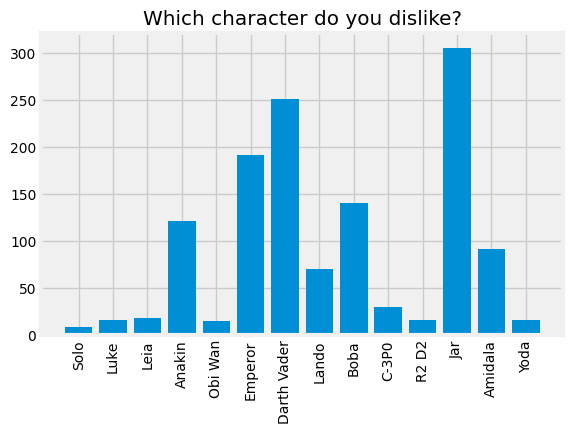

In [72]:
keys = final_dislike_dict.keys()
values = final_dislike_dict.values()

#create bar plot
plt.bar(keys, values)
plt.xticks(rotation=90)
plt.title('Which character do you dislike?')
plt.show()

`Jar Jar Binks` got the most votes on dislike (over 300). As we would expect `Dart Vader` and `Emperor Palpatine` are also not liked. However, as we compared number of votes for likes and dislikes, we see that respondents less often have chosen characters who hate. It could mean that, they prefer choose neutral position than aswerd that they don't like that hero.

`Emperor Palpatine` is the most controversial character, because difference between likes (around 250) and dislikes (almost 200) is the smallest.

## Conclusion

To sum up, we explored dataset of Star Wars survey. Below are our findings:

* **"Star Wars: Episode V The Empire Strikes Back" is indeed the highest-ranked and the most viewed of all, both overall and by each investigated category of people: men and women, fans and non-fans**,
* Star wars episode III Revenge of the Sith has either the worst score and the lowest number of views.
* Episode I has the biggest difference in ranking score, where Females rated on around 3.3 and males - 4.0,
* Well-educated people watched at least one part of Star Wars more often than people with High School degree or less,
* People who most often watch any Star Wars movie usually come frome: Pacific, South Atlantic and East North Central,
* Respondents in age 45-60 have seen a minimum one Episode the most often, whereas people in 18-29 and older than 60 the least,
* The most favourite characters are: Hans Solo, Luke Skywalker, Obi Wan Kenobi, R2 D2 and Yoda,
* The least favourite characters is Jar Jar Binks,
* Respondents prefer to choose that they like or have neutral attitude to character than that they don't like him,
* Emperor Palpatine is the most controversial characte 